# Assignment 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = 'UCI_data.csv'
df = pd.read_csv(file, on_bad_lines='skip')
df.head()

date         T1       RH_1         T2       RH_2         T3  \
0  2016-04-19 20:30:00  22.200000  39.500000  20.566667  37.656667  22.230000   
1  2016-03-05 04:40:00  20.356667  37.126667  17.566667  40.230000  20.890000   
2  2016-03-14 12:40:00  20.926667  38.790000  21.100000  35.526667  21.600000   
3  2016-01-22 15:30:00  18.290000  38.900000  17.290000  39.260000  18.390000   
4  2016-02-10 00:40:00  22.290000  42.333333  21.600000  40.433333  22.666667   

        RH_3         T4       RH_4         T5  ...   RH_9  T_out  Press_mm_hg  \
0  37.030000  22.318571  36.610000  20.633333  ...  33.90   9.70   766.100000   
1  37.663333  18.700000  36.260000  18.463333  ...  41.09   0.30   740.333333   
2  36.290000  21.000000  34.826667  18.100000  ...  38.76   4.40   768.466667   
3  39.326667  16.100000  38.790000  16.100000  ...  39.20   3.35   760.600000   
4  43.363333  19.100000  40.900000  19.290000  ...  43.73   3.20   738.900000   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  \
0    65.5   3.500000   40.000000   3.350000  24.061869  24.061869   
1    99.0   1.000000   41.333333   0.100000   4.622052   4.622052   
2    72.0   6.000000   22.666667  -0.266667   5.635898   5.635898   
3    82.0   5.500000   41.000000   0.500000  49.216445  49.216445   
4    88.0   7.333333   56.000000   1.400000  47.617579  47.617579   

   TARGET_energy  
0             60  
1             50  
2             80  
3             40  
4             60  

[5 rows x 28 columns]

In [3]:
df.dtypes

date              object
T1               float64
RH_1             float64
T2               float64
RH_2             float64
T3               float64
RH_3             float64
T4               float64
RH_4             float64
T5               float64
RH_5             float64
T6               float64
RH_6             float64
T7               float64
RH_7             float64
T8               float64
RH_8             float64
T9               float64
RH_9             float64
T_out            float64
Press_mm_hg      float64
RH_out           float64
Windspeed        float64
Visibility       float64
Tdewpoint        float64
rv1              float64
rv2              float64
TARGET_energy      int64
dtype: object

In [4]:
df.shape

(19735, 28)

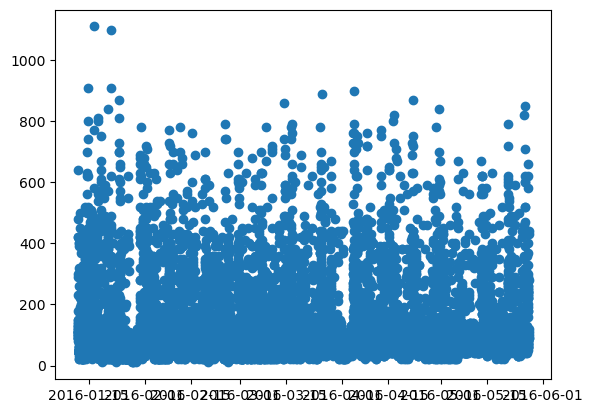

In [5]:
df['date'] = pd.to_datetime(df['date'])
plt.scatter(df['date'], df["TARGET_energy"])
plt.show()

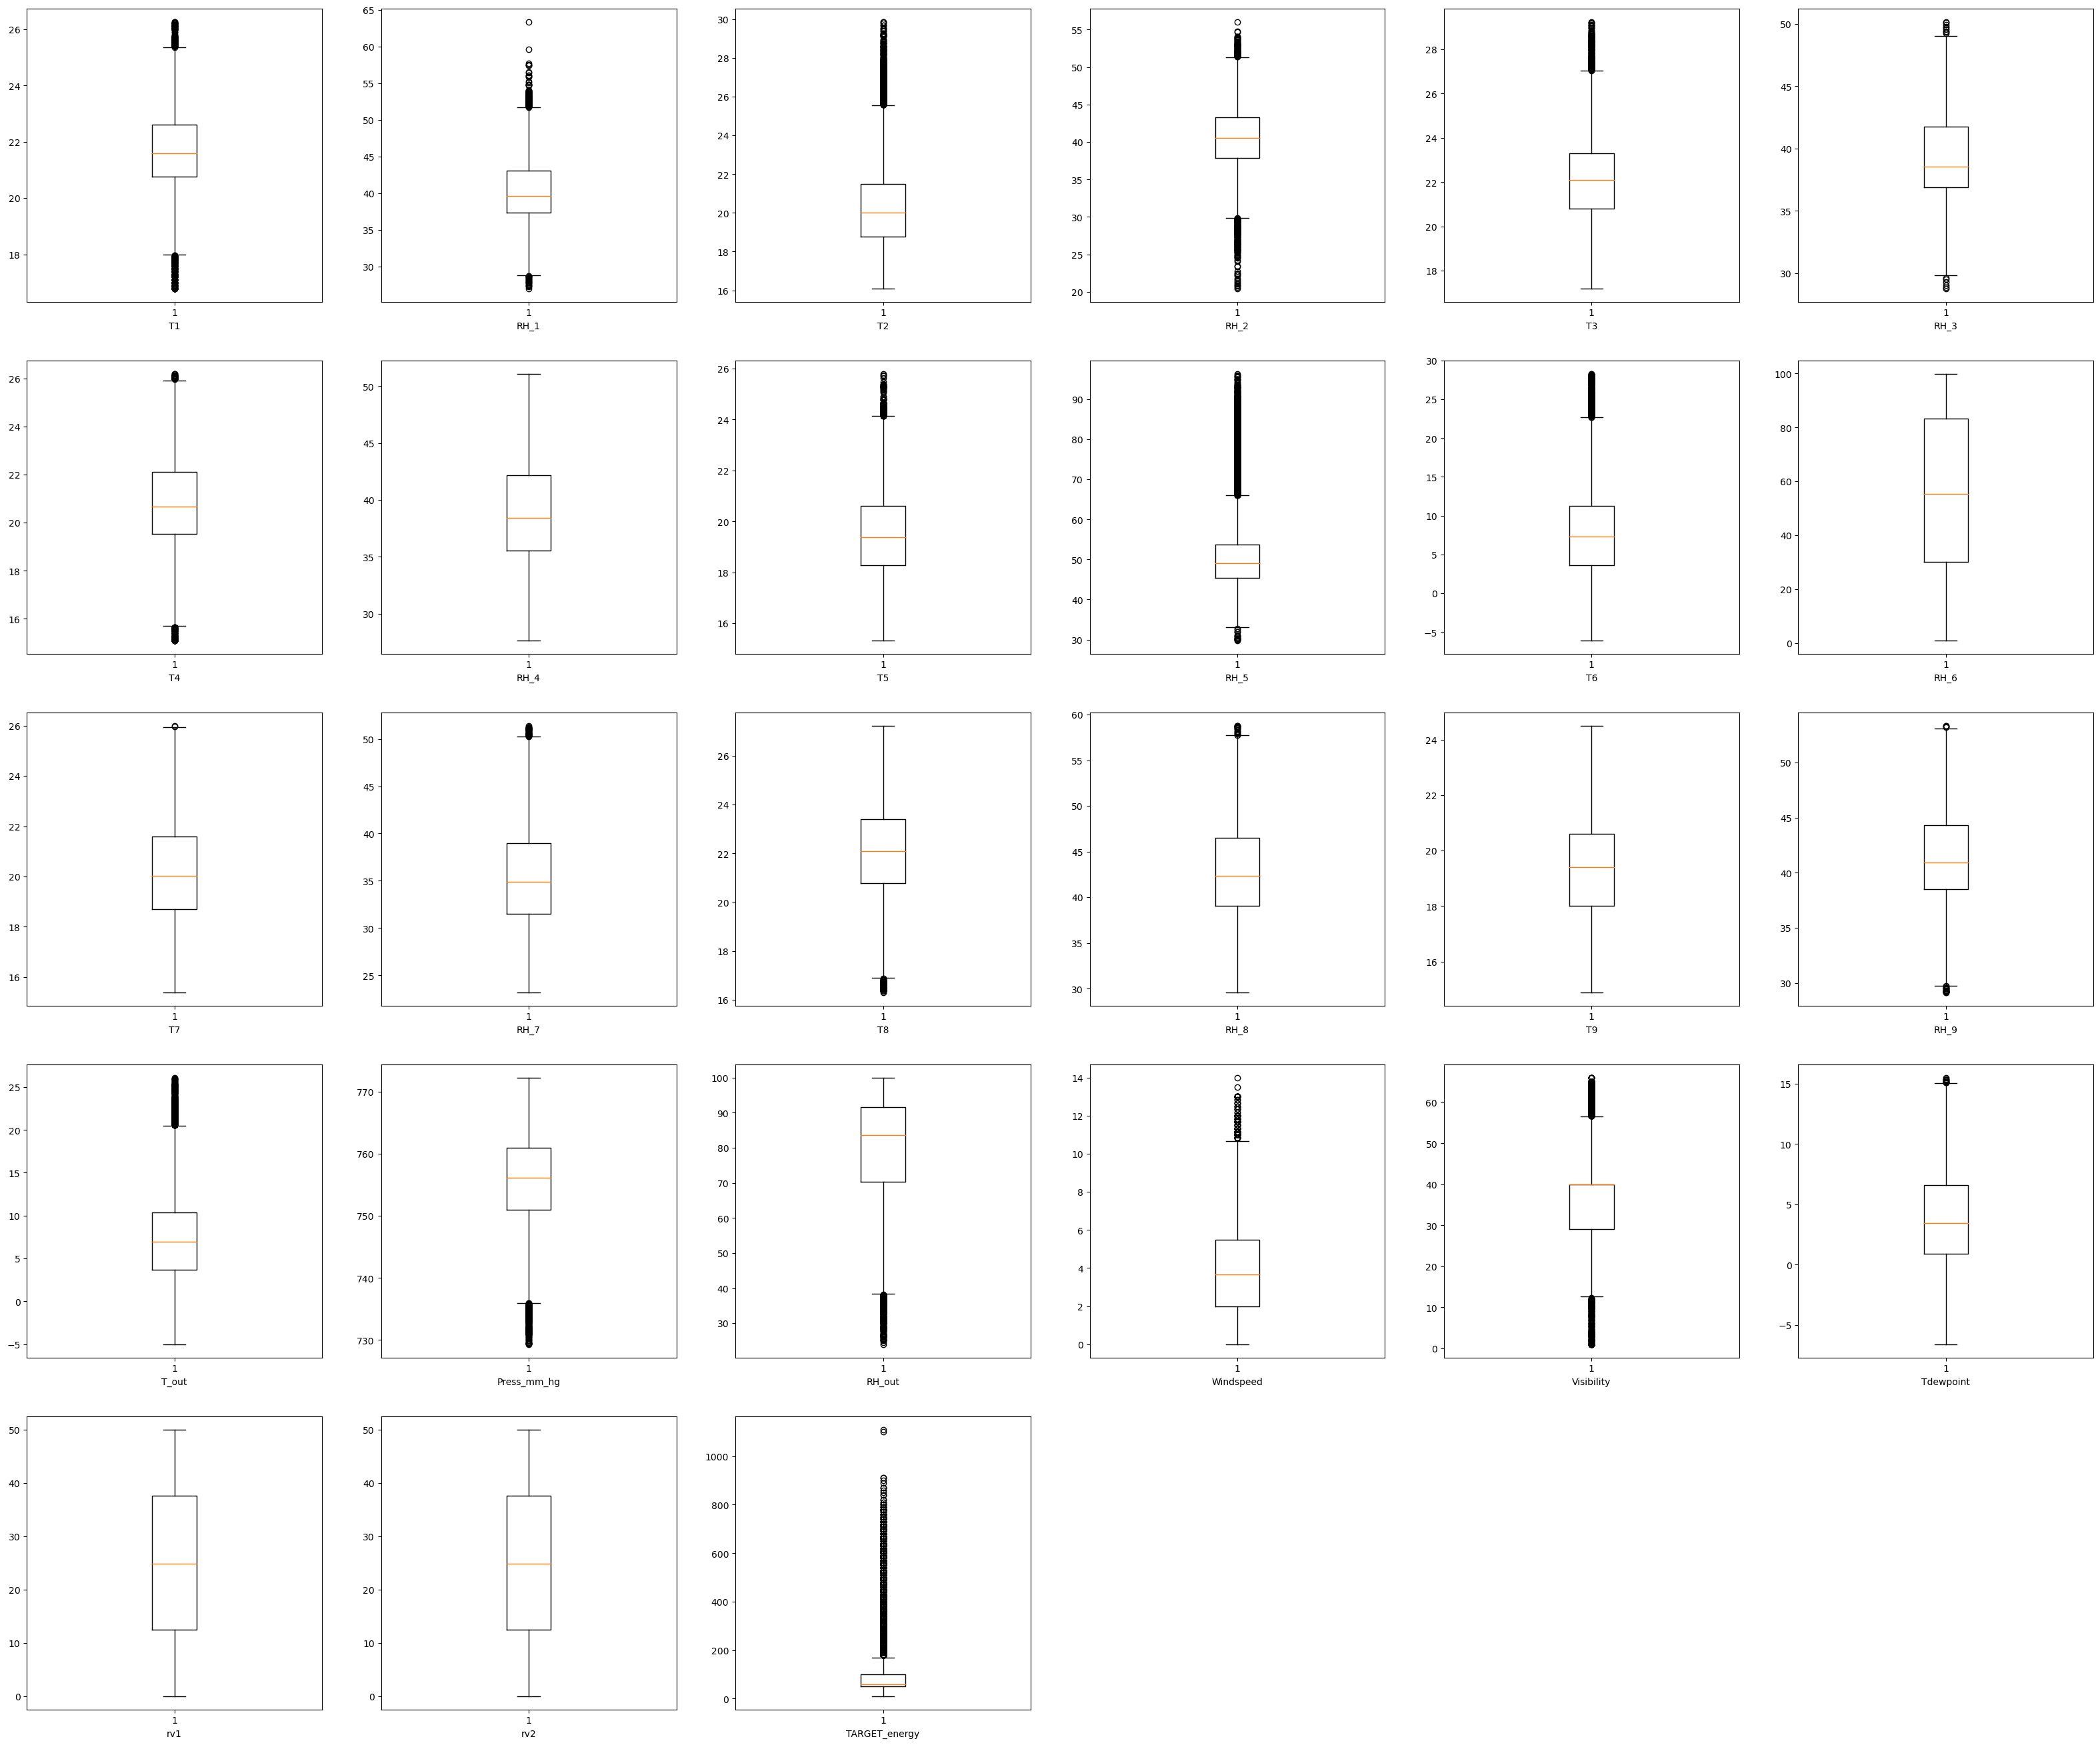

In [6]:
df = df.set_index('date')
plt.figure(figsize=(40,40))
for i, col in enumerate(df.columns):
    plt.subplot(6,6,i+1)  
    plt.boxplot(df[col])
    plt.xlabel(col)
plt.show()

In [7]:
for i, col in enumerate(df.columns[:-1]):
   
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]

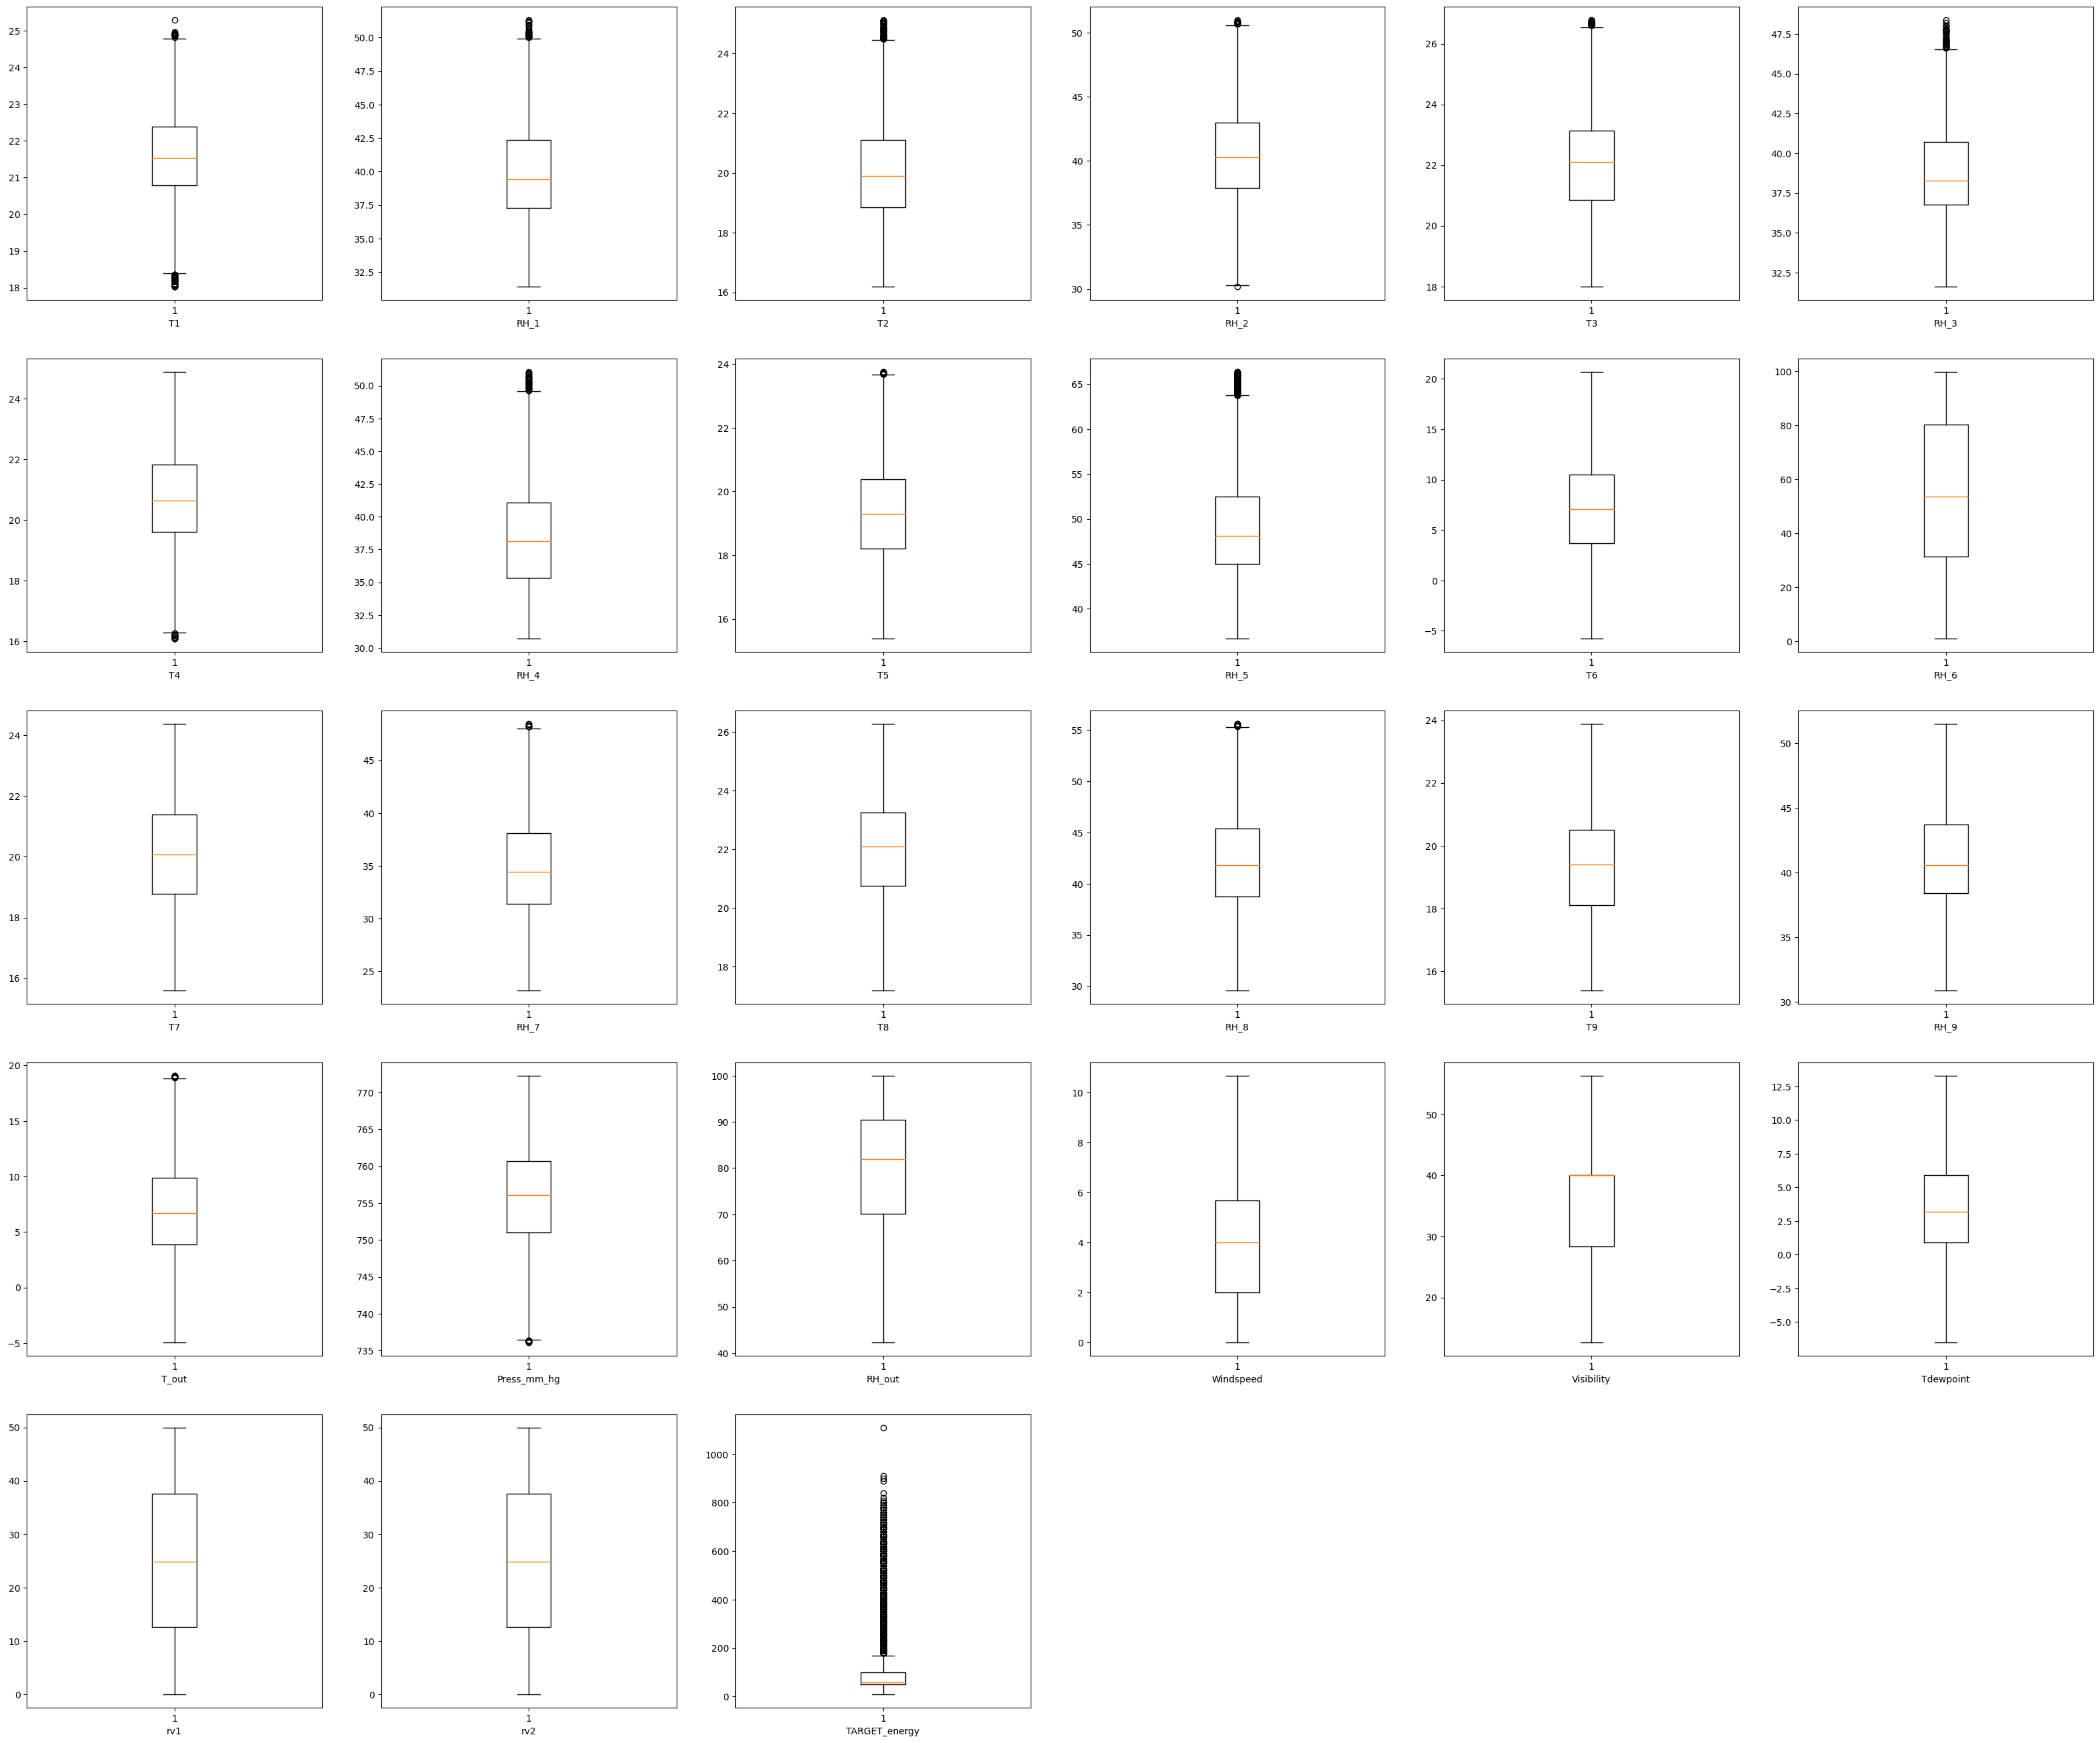

In [8]:
plt.figure(figsize=(40,40))
for i, col in enumerate(df.columns):
    plt.subplot(6,6,i+1)  
    plt.boxplot(df[col])
    plt.xlabel(col)
plt.show()

In [9]:
df.shape

(13670, 27)

In [10]:
df.isna().sum()

T1               0
RH_1             0
T2               0
RH_2             0
T3               0
RH_3             0
T4               0
RH_4             0
T5               0
RH_5             0
T6               0
RH_6             0
T7               0
RH_7             0
T8               0
RH_8             0
T9               0
RH_9             0
T_out            0
Press_mm_hg      0
RH_out           0
Windspeed        0
Visibility       0
Tdewpoint        0
rv1              0
rv2              0
TARGET_energy    0
dtype: int64

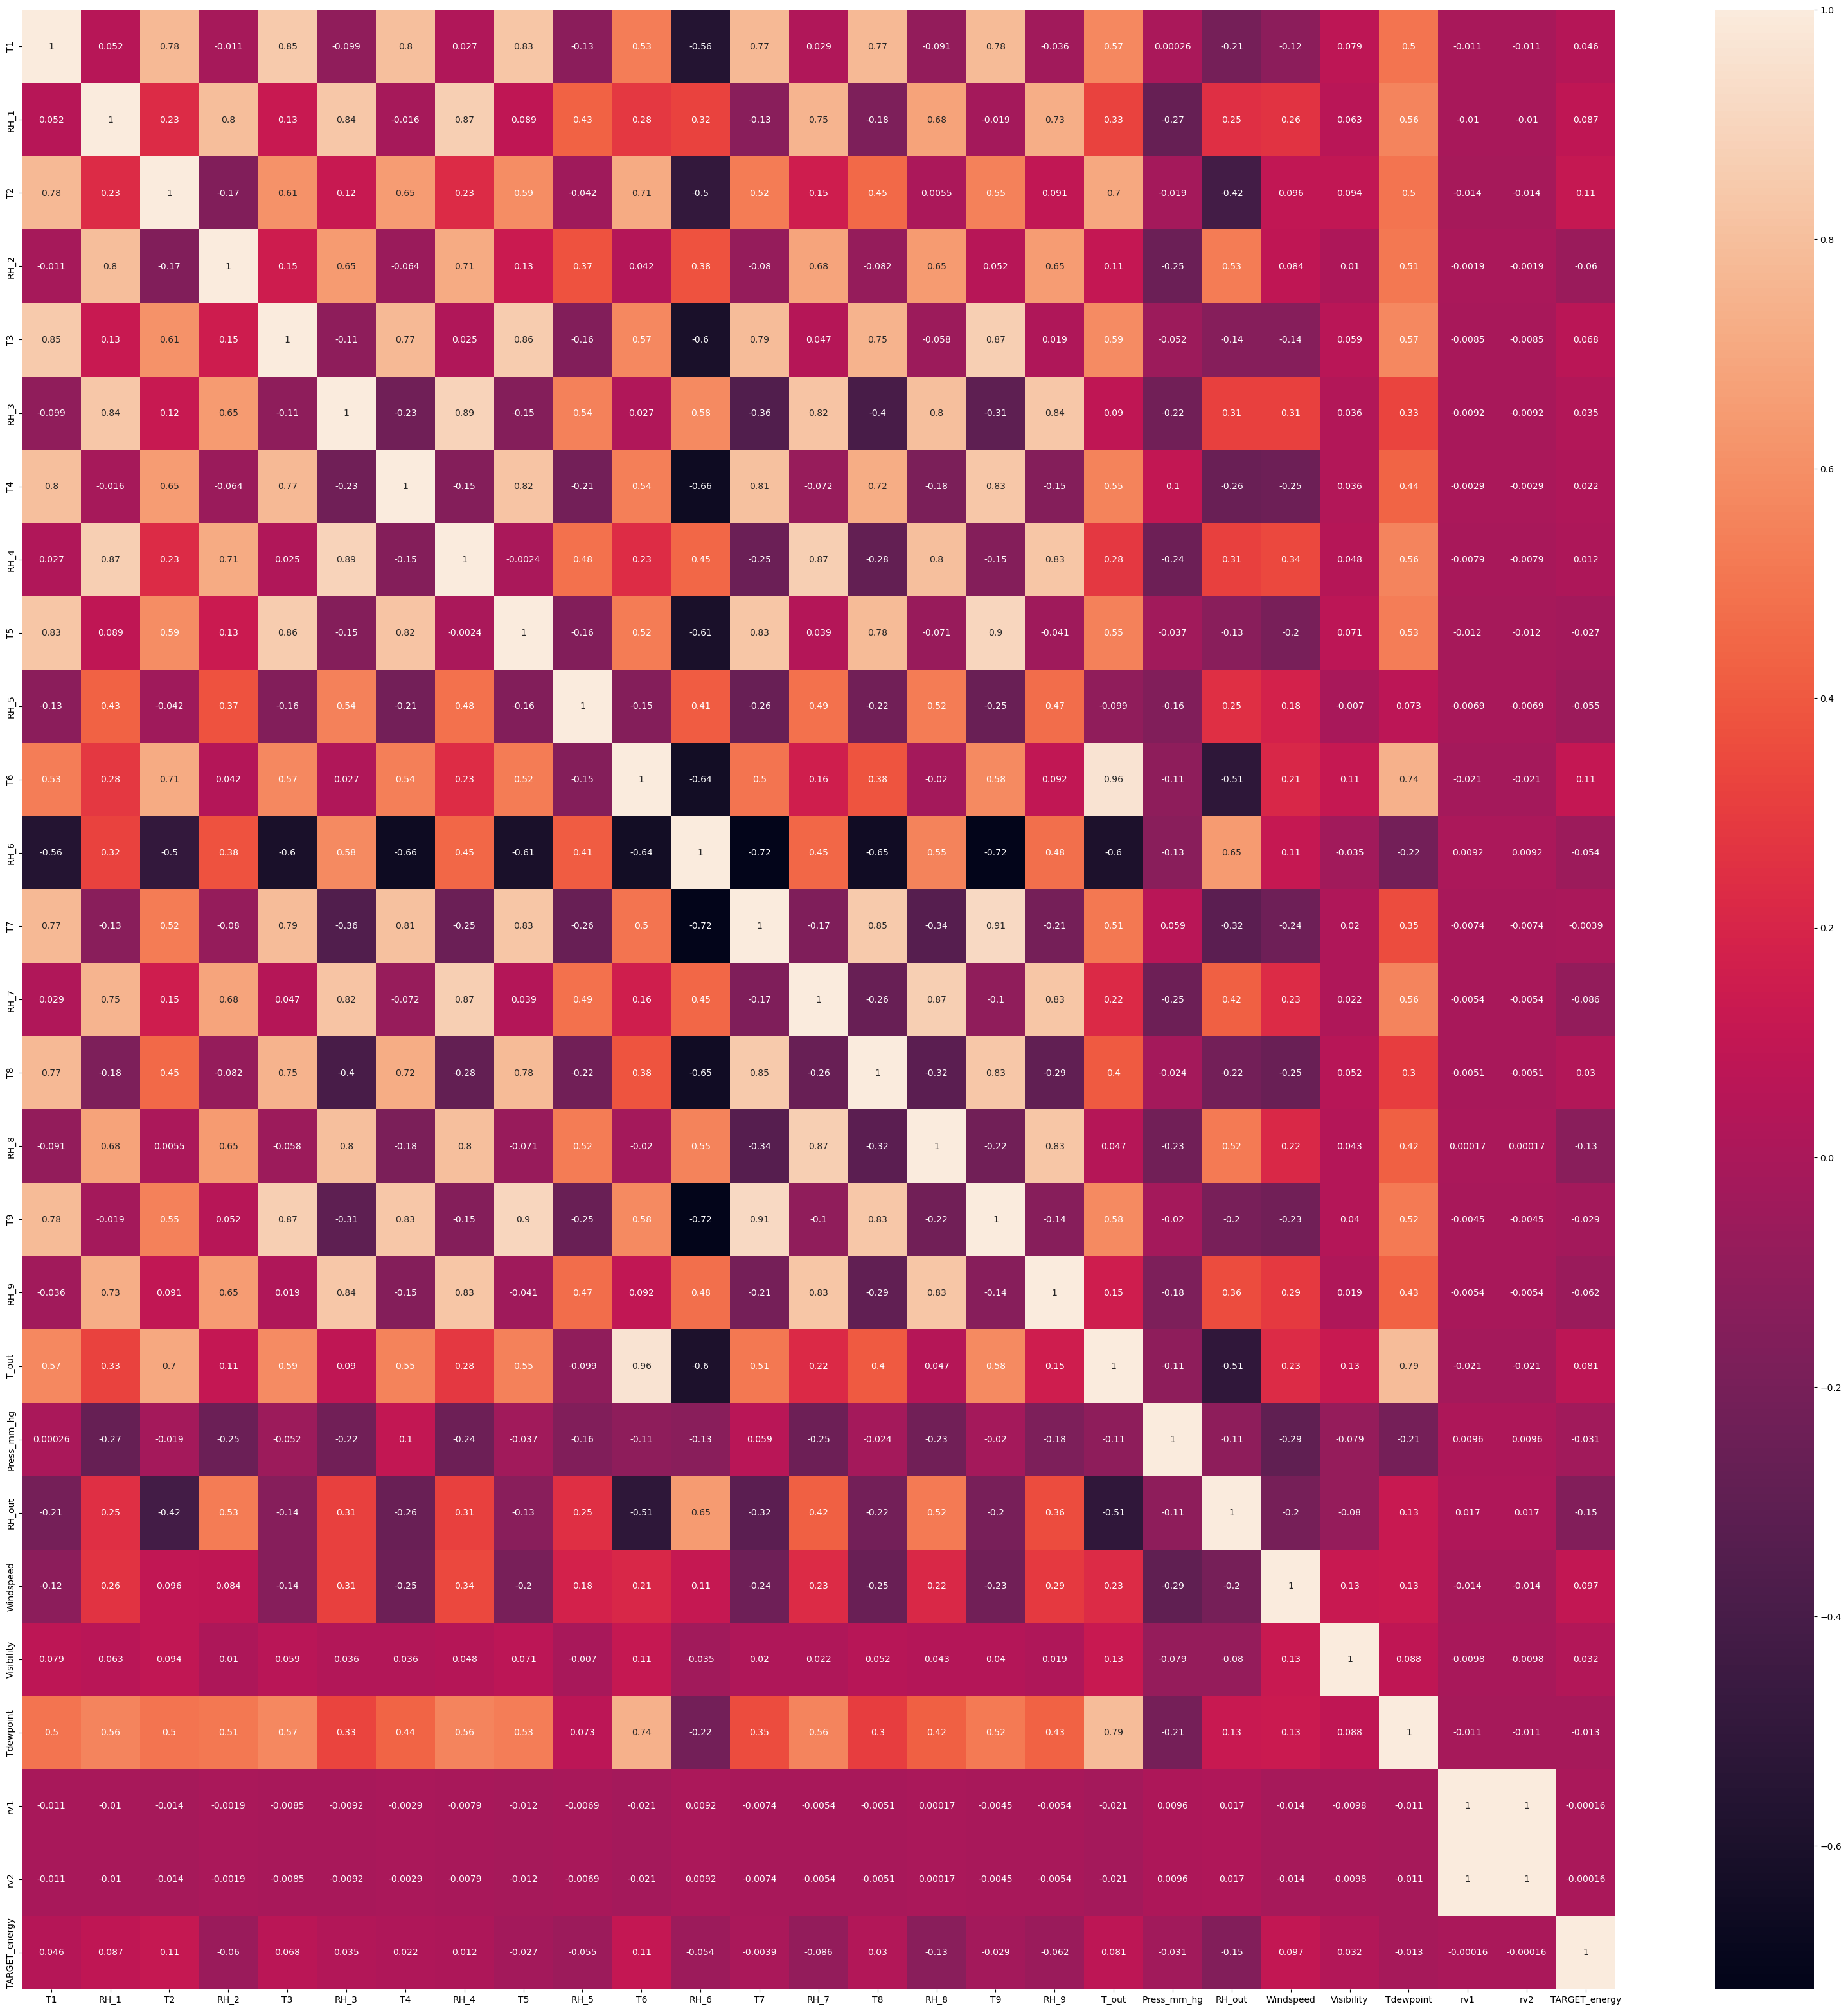

In [11]:
import seaborn as sns
plt.figure(figsize=(40,40))
correlation_table = df.corr()
sns.heatmap(correlation_table,annot=True)
plt.show()

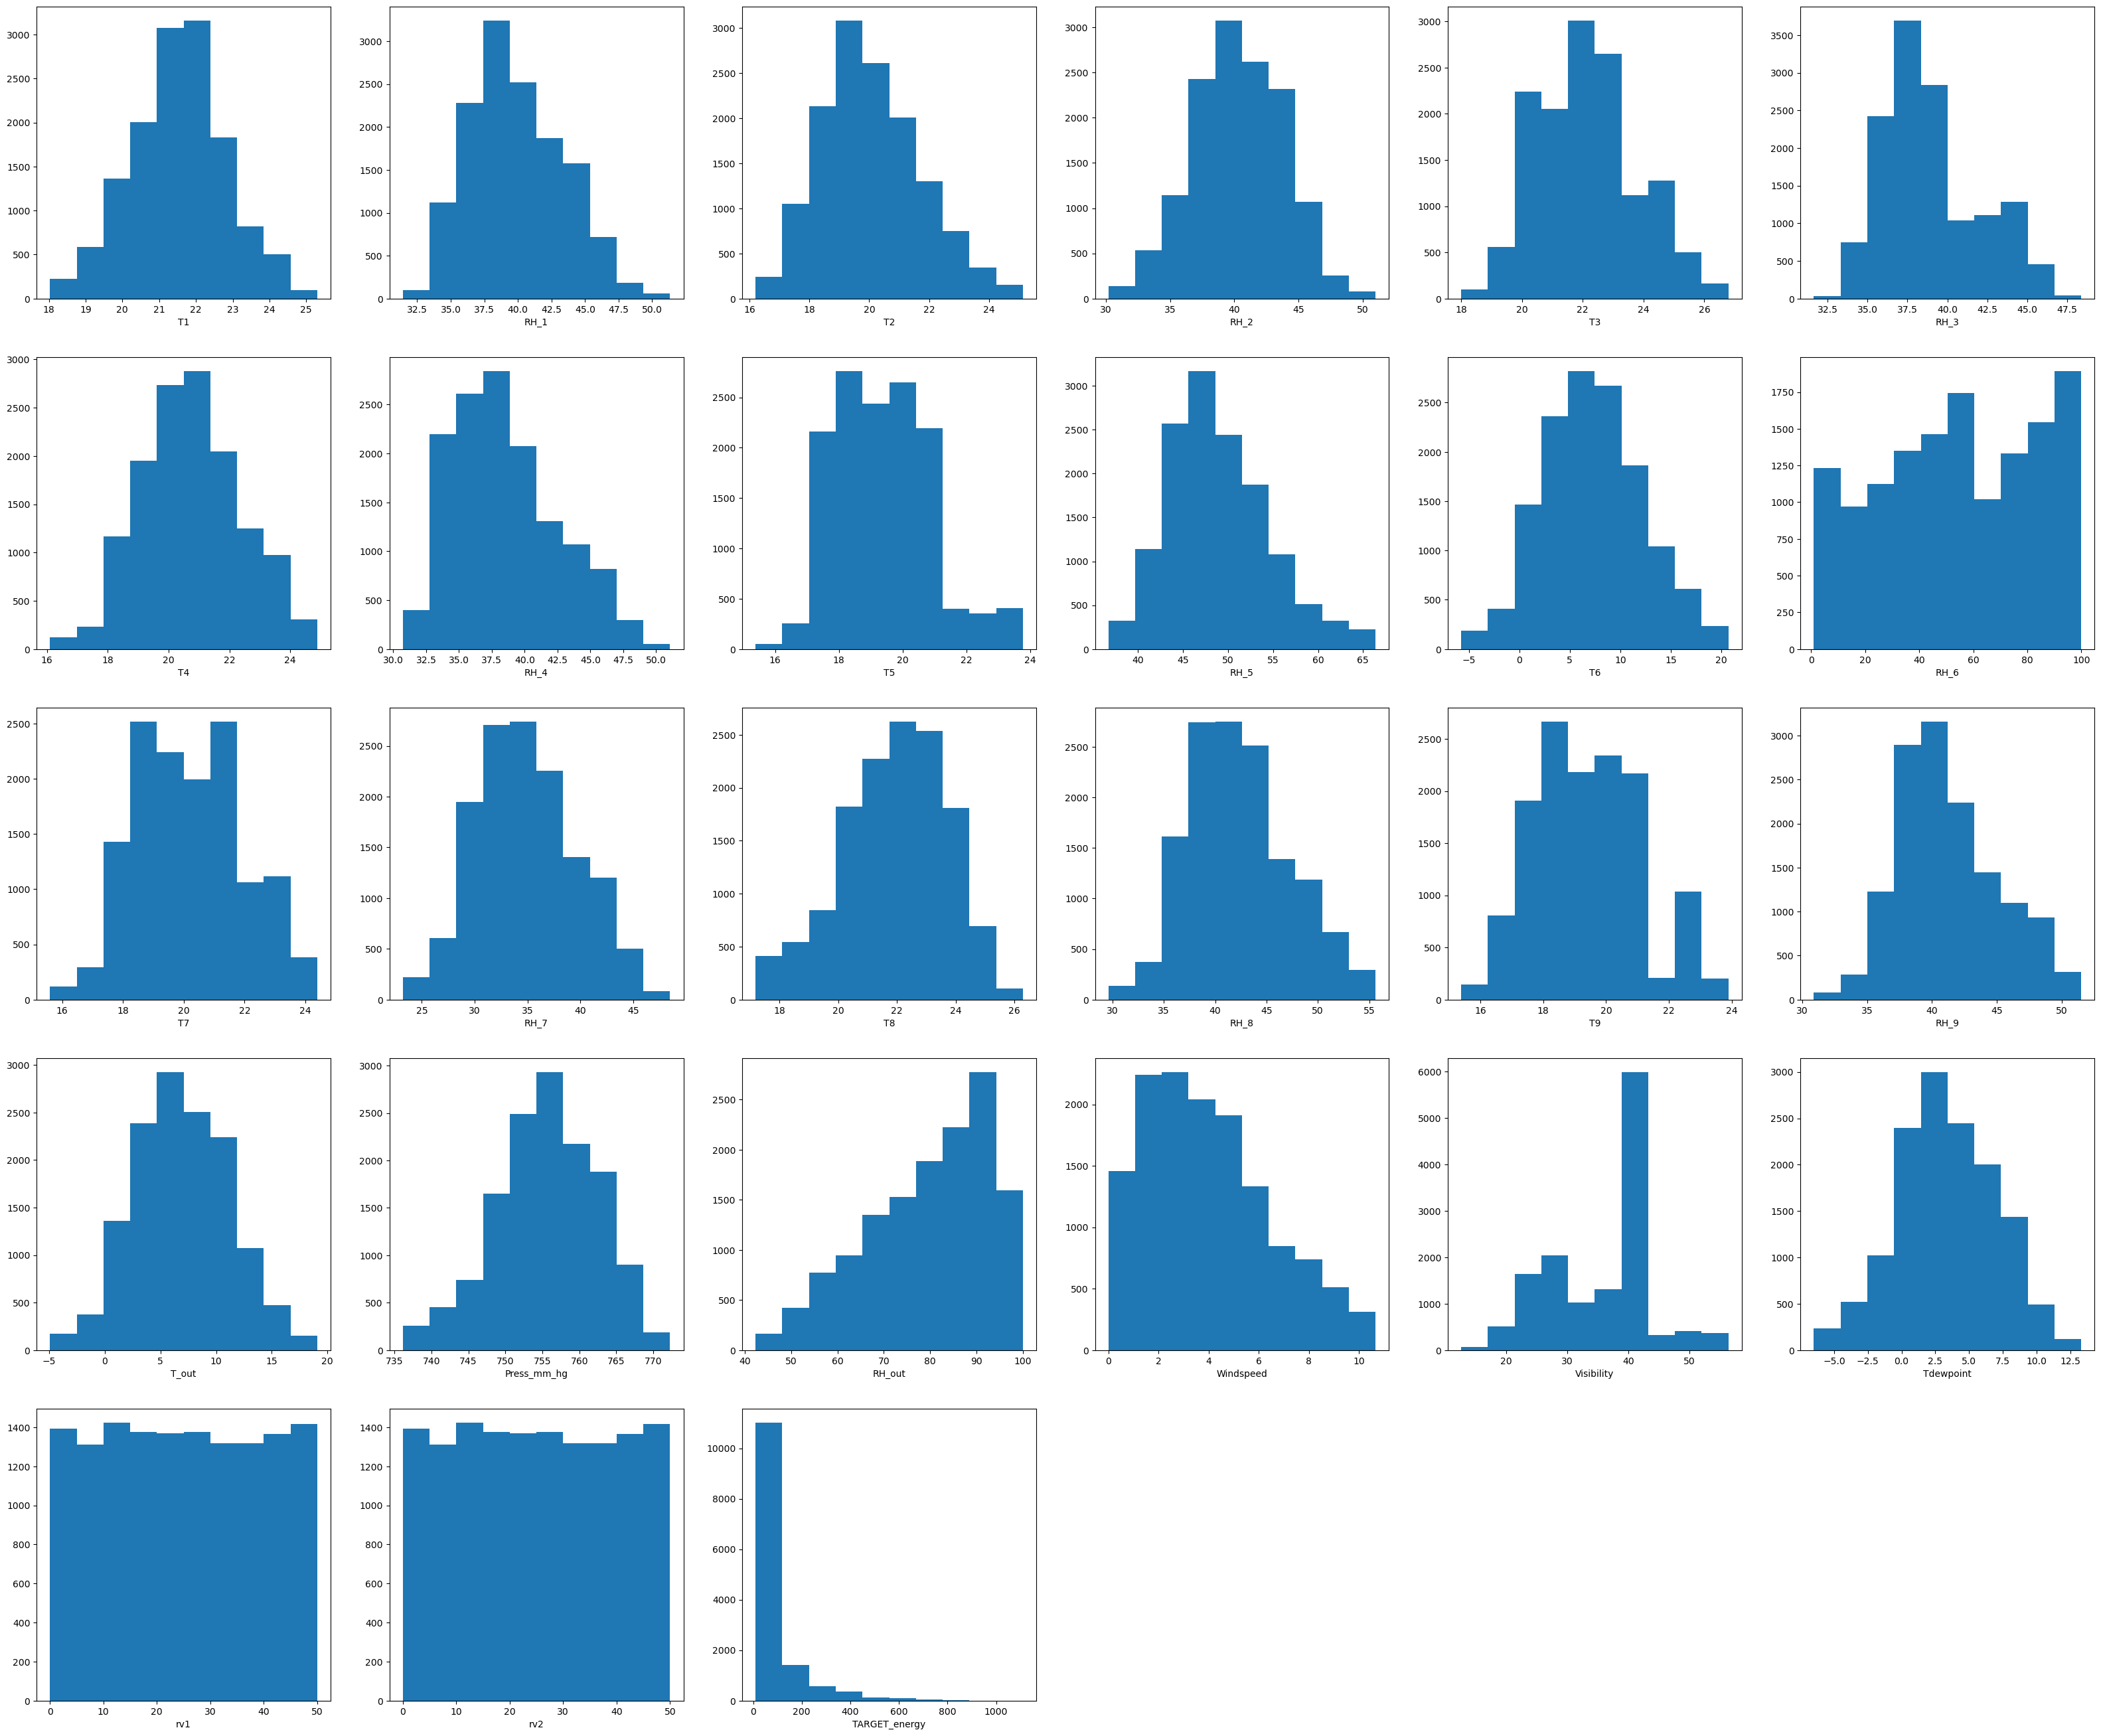

In [12]:
plt.figure(figsize=(40,40))
for i, col in enumerate(df.columns):
    plt.subplot(6,6,i+1)  
    plt.hist(df[col])
    plt.xlabel(col)
plt.show()

In [13]:
df = df.reset_index()

print(df['date'].dtype)

df = df.sort_values(by=['date'])

datetime64[ns]


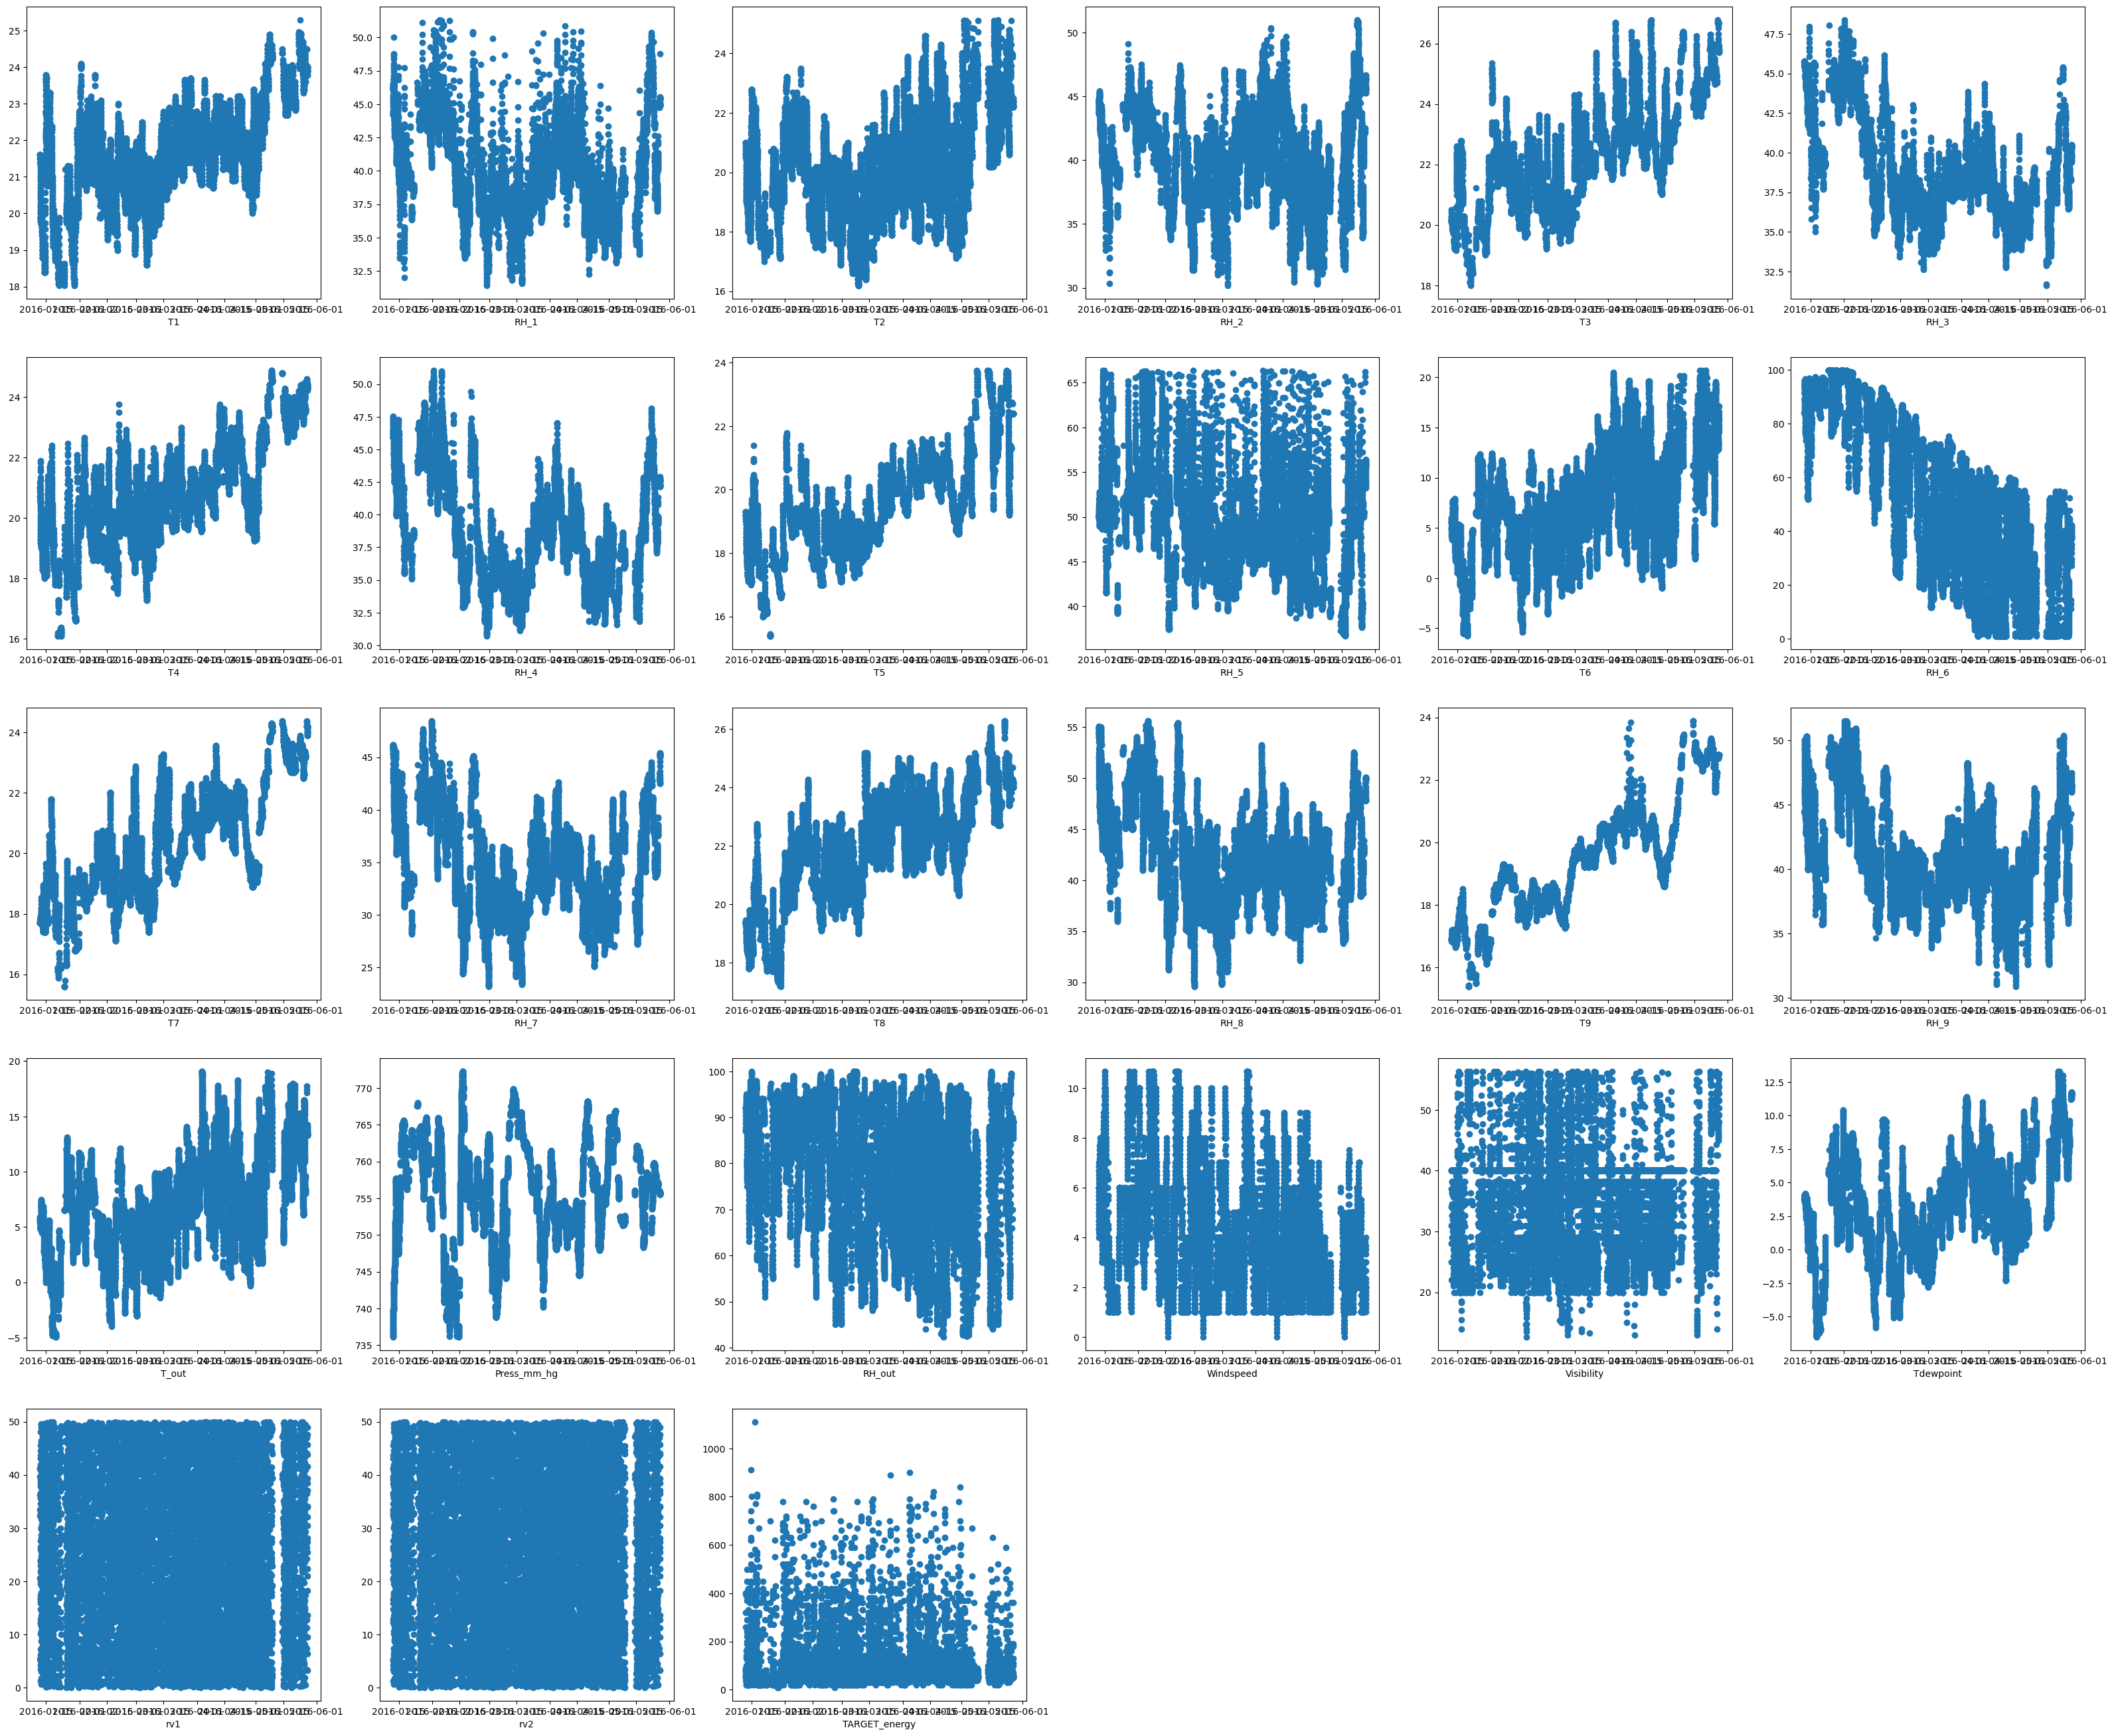

In [14]:
plt.figure(figsize=(40,40))
for i, col in enumerate(df.columns[1:]):
    plt.subplot(6,6,i+1)  
    plt.scatter(df['date'], df[col])
    plt.xlabel(col)
plt.show()

In [15]:
df = df.drop(['RH_out','rv1','rv2','Visibility','RH_5'],axis=1)

# Part 2: Non neural supervised algorithm.

## Modelling using XGBoost

In [16]:

df = df.sort_values(by='date')
df.set_index('date', inplace=True)
df.head()

T1   RH_1    T2       RH_2       T3       RH_3  \
date                                                                    
2016-01-11 22:40:00  21.6  44.36  21.0  43.833333  20.5000  45.730000   
2016-01-11 22:50:00  21.6  44.20  21.0  43.700000  20.5000  45.590000   
2016-01-11 23:00:00  21.6  44.20  21.0  43.590000  20.4175  45.545000   
2016-01-11 23:10:00  21.6  44.20  21.0  43.590000  20.3900  45.663333   
2016-01-11 23:20:00  21.6  44.20  21.0  43.700000  20.2900  45.730000   

                            T4       RH_4       T5        T6  ...       RH_7  \
date                                                          ...              
2016-01-11 22:40:00  20.596667  47.223333  19.2000  6.000000  ...  42.626667   
2016-01-11 22:50:00  20.996667  47.030000  19.2225  6.000000  ...  42.626667   
2016-01-11 23:00:00  21.166667  46.526667  19.2900  5.966667  ...  42.760000   
2016-01-11 23:10:00  21.033333  46.400000  19.2900  5.900000  ...  43.030000   
2016-01-11 23:20:00  20.963333  46.433333  19.2900  5.763333  ...  43.163333   

                            T8       RH_8         T9       RH_9  T_out  \
date                                                                     
2016-01-11 22:40:00  19.340000  48.950000  16.823333  44.433333   5.80   
2016-01-11 22:50:00  19.290000  49.230000  16.890000  44.500000   5.85   
2016-01-11 23:00:00  19.356667  49.430000  16.890000  44.500000   5.90   
2016-01-11 23:10:00  19.390000  49.890000  16.890000  45.066667   5.80   
2016-01-11 23:20:00  19.390000  50.163333  16.890000  45.260000   5.70   

                     Press_mm_hg  Windspeed  Tdewpoint  TARGET_energy  
date                                                                   
2016-01-11 22:40:00   736.133333   6.666667   3.766667            260  
2016-01-11 22:50:00   736.216667   6.833333   3.783333             80  
2016-01-11 23:00:00   736.300000   7.000000   3.800000             80  
2016-01-11 23:10:00   736.400000   6.833333   3.850000             80  
2016-01-11 23:20:00   736.500000   6.666667   3.900000             60  

[5 rows x 22 columns]

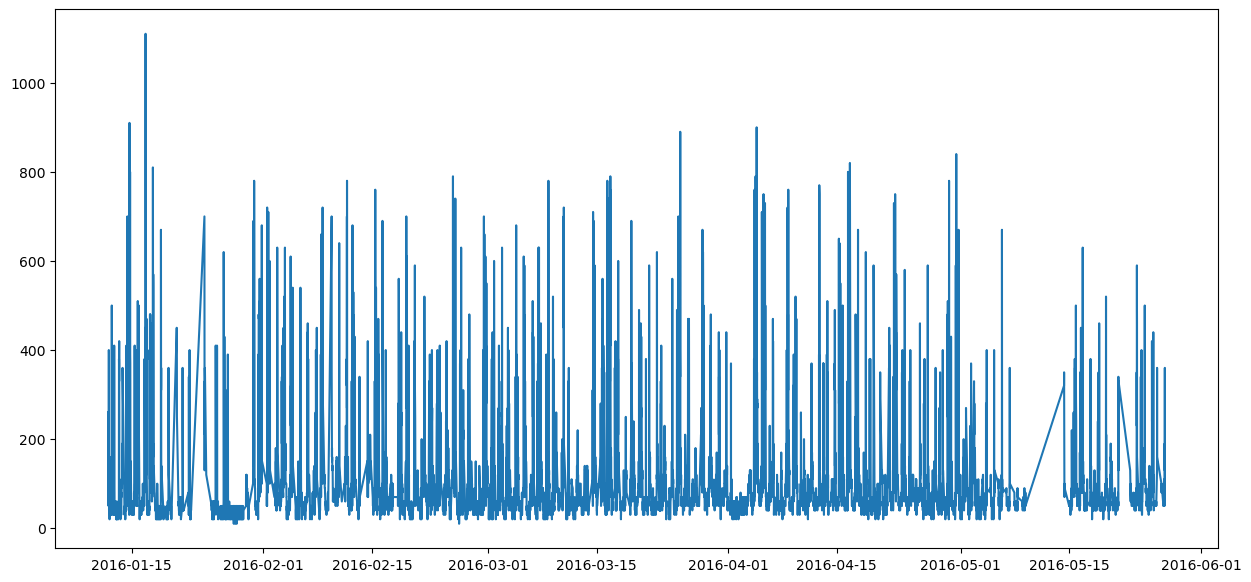

In [17]:
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['TARGET_energy'])

In [18]:
df['hour'] = df.index.hour
df['day'] = df.index.dayofweek
df['month'] = df.index.month

In [19]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(df, test_size=0.2, shuffle=False)

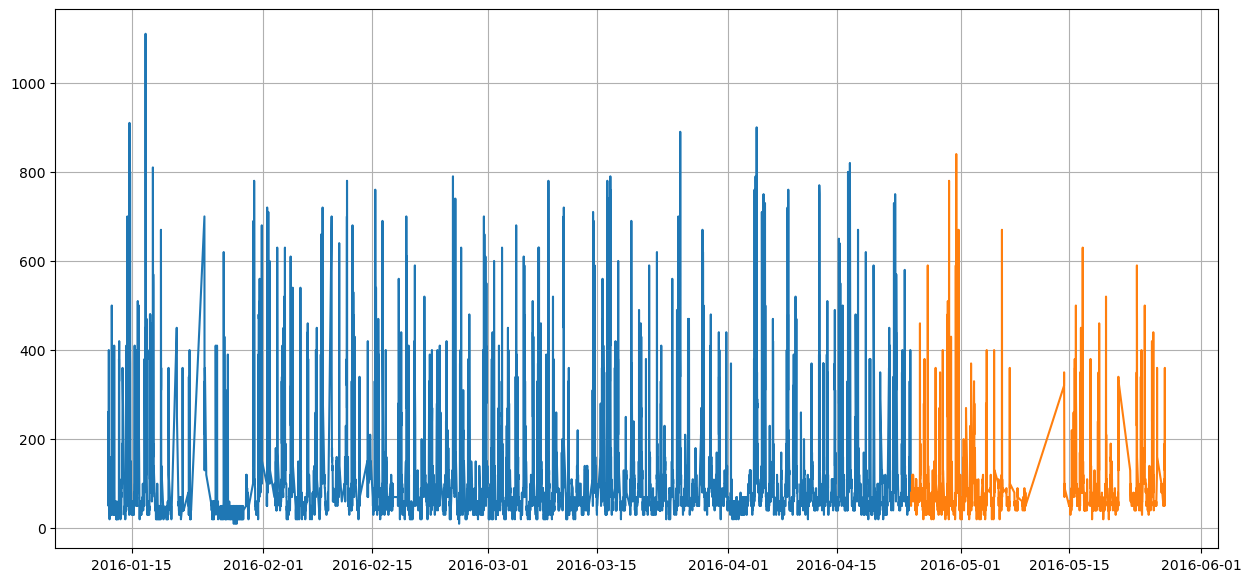

In [20]:
plt.figure(figsize=(15, 7))
plt.plot(training_data.index,training_data['TARGET_energy'])
plt.plot(testing_data.index,testing_data['TARGET_energy'])

plt.grid(True)
plt.show()

In [21]:
training_set, validation_set = train_test_split(training_data, test_size=0.2, shuffle=False)

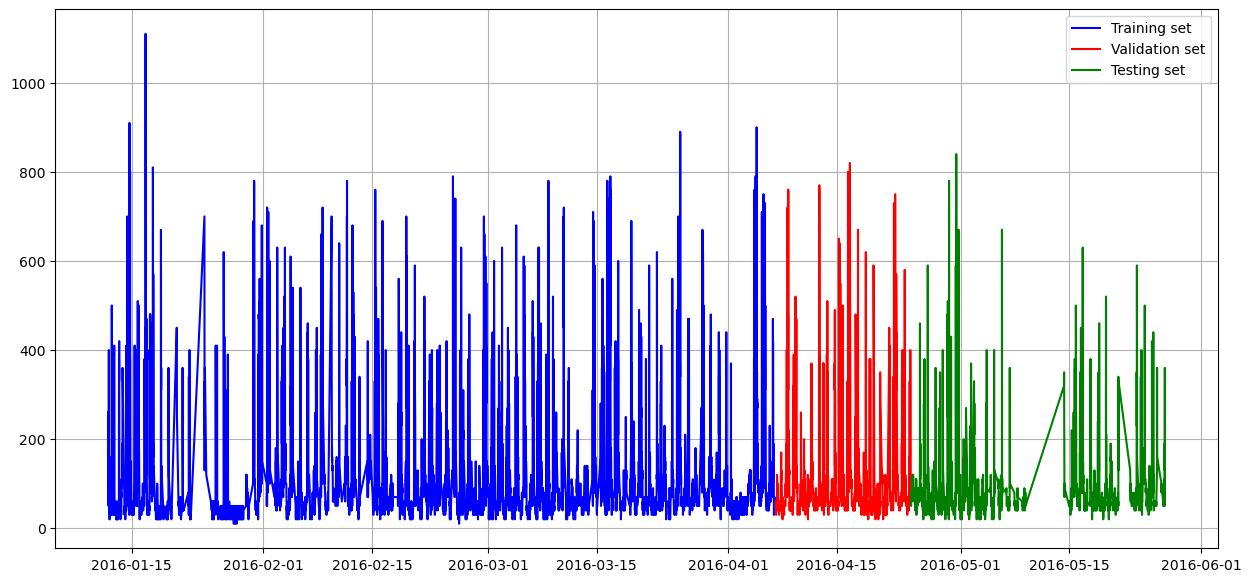

In [22]:
plt.figure(figsize=(15, 7))
plt.plot(training_set.index, training_set['TARGET_energy'], label='Training Set', color='blue')
plt.plot(validation_set.index, validation_set['TARGET_energy'], label='Validation Set', color='red')
plt.plot(testing_data.index,testing_data['TARGET_energy'], color='green')

plt.legend(["Training set","Validation set","Testing set"])
plt.grid(True)
plt.show()

In [23]:
! pip install xgboost
import xgboost as xgb

In [24]:
X_train, y_train = training_set.drop(columns=['TARGET_energy']), training_set['TARGET_energy']
X_test, y_test = validation_set.drop(columns=['TARGET_energy']), validation_set['TARGET_energy']


In [25]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
training_predictions = model.predict(X_train)
testing_predictions = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error
import math

mse_training = mean_squared_error(training_predictions, y_train)
rmse_training = math.sqrt(mse_training)

mse_testing = mean_squared_error(testing_predictions,y_test)
rmse_testing = math.sqrt(mse_testing)

In [28]:
print(f"RMSE for training: {rmse_training}")
print(f"MSE for training: {mse_training}\n")

print(f"RMSE for testing: {rmse_testing}")
print(f"MSE for testing: {mse_testing}")

RMSE for training: 30.127012266963515
MSE for training: 907.63686813377

RMSE for testing: 162.00426662247705
MSE for testing: 26245.38240388663


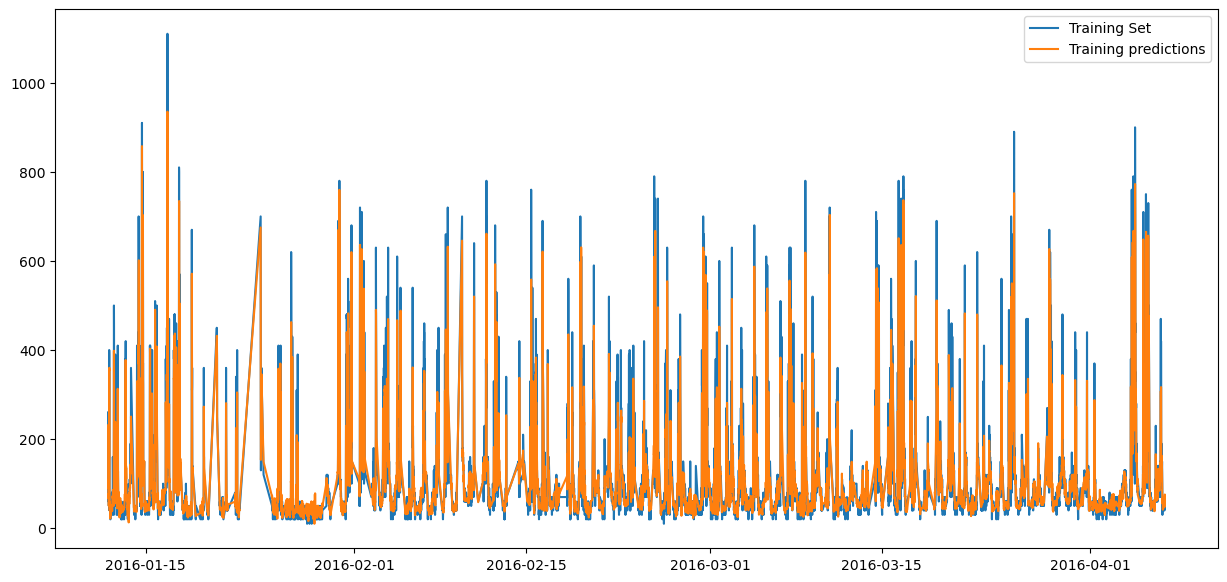

In [29]:
plt.figure(figsize=(15, 7))
plt.plot(training_set.index, training_set['TARGET_energy'], label='Training Set',)
plt.plot(training_set.index, training_predictions, label='Training predictions')
plt.legend()

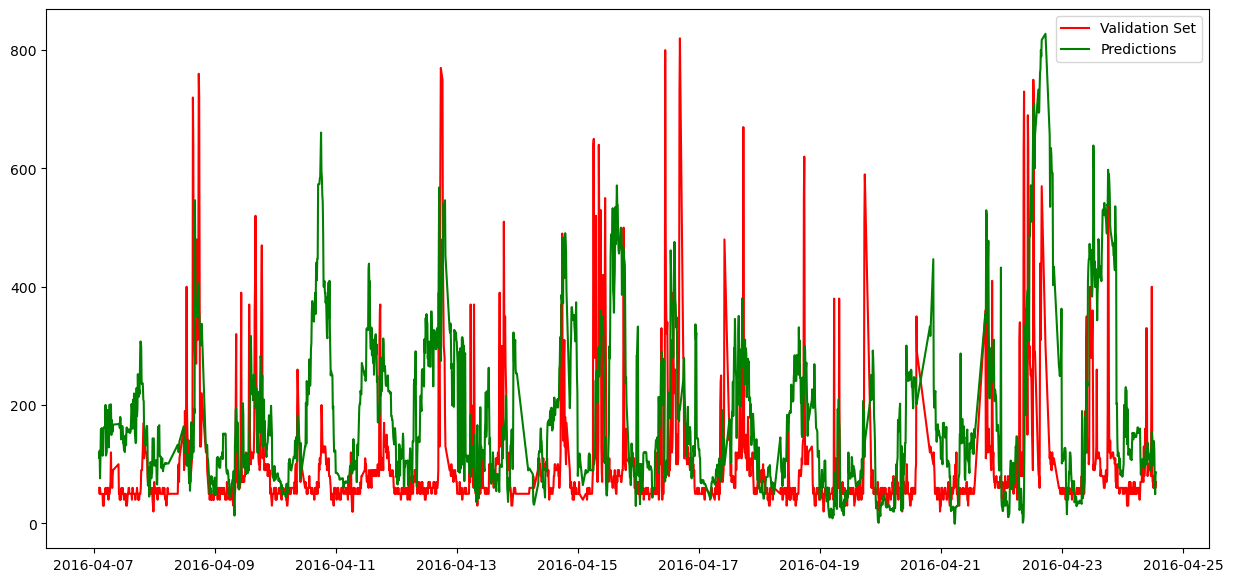

In [30]:
plt.figure(figsize=(15, 7))
plt.plot(validation_set.index, validation_set['TARGET_energy'], label='Validation Set', color='red')
plt.plot(validation_set.index, testing_predictions, color='green', label='Predictions')

plt.legend()
plt.show()